# Imports

In [208]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import gdown
from pathlib import Path
from typing import List, Union, Dict, Optional
import warnings
warnings.filterwarnings("ignore")

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [209]:
data_folder = Path(r"/content/drive/MyDrive/Polymer_Scattering _ML/Excel files/main_dataset/")

In [210]:
pls_data_clean_dir = data_folder/"dataset_wo_block_cp_(fp-hsp)_added_additive_dropped_polyHSP_dropped_peaks_appended.pkl"
print(f"does it exist: {pls_data_clean_dir.exists()}, {pls_data_clean_dir}")
pls_data_cleaned = pd.read_pickle(pls_data_clean_dir)

does it exist: True, /content/drive/MyDrive/Polymer_Scattering _ML/Excel files/main_dataset/dataset_wo_block_cp_(fp-hsp)_added_additive_dropped_polyHSP_dropped_peaks_appended.pkl


In [211]:
pls_data_cleaned_text_only = pls_data_cleaned[pls_data_cleaned['matched index'].isna()]
derived_peaks_df_updated = pls_data_cleaned[pls_data_cleaned['matched index'].notna()]

In [212]:
monomodal_text = [peaks[0] for peaks in pls_data_cleaned_text_only["Rh at peaks (above 1 nm)"] if peaks!=None]
first_order = [sorted(peaks)[0] for peaks in derived_peaks_df_updated['Rh at peaks (above 1 nm)'] if len(peaks) > 1]
second_order = [sorted(peaks)[1] for peaks in derived_peaks_df_updated['Rh at peaks (above 1 nm)'] if len(peaks) > 1]
third_order = [sorted(peaks)[2] for peaks in derived_peaks_df_updated['Rh at peaks (above 1 nm)'] if len(peaks) > 2]
forth_order = [sorted(peaks)[3] for peaks in derived_peaks_df_updated['Rh at peaks (above 1 nm)'] if len(peaks) > 3]
fifth_order = [sorted(peaks)[4] for peaks in derived_peaks_df_updated['Rh at peaks (above 1 nm)'] if len(peaks) > 4]
first_order_just_mono = [sorted(peaks)[0] for peaks in derived_peaks_df_updated['Rh at peaks (above 1 nm)'] if len(peaks)==1]
first_order_mono_included = [sorted(peaks)[0] for peaks in derived_peaks_df_updated['Rh at peaks (above 1 nm)']]
print(forth_order,fifth_order)

distribution_data_first_order = pd.DataFrame({
    'value': first_order_just_mono + first_order,
    'data type': ['just_mono'] * len(first_order_just_mono) + ['excluded_mono'] * len(first_order)
})

distribution_peaks = pd.DataFrame({
    'value': monomodal_text + first_order_just_mono + first_order + second_order + third_order + forth_order + fifth_order,
    'peak type': (['mono by text'] * len(monomodal_text)+
                  ['first monomodal'] * len(first_order_just_mono)+
                  ['first multimodal'] * len(first_order) +
                  ['second'] * len(second_order) +
                  ['third'] * len(third_order) +
                  ['forth'] * len(forth_order) +
                  ['fifth'] * len(fifth_order))
                  })

def plot_peaks_distribution(
                            data,
                            title: str,
                            x_label: str,
                            transform_function: callable=None,
                            hue: str=None
                            ) -> None:

    fig, ax = plt.subplots(figsize=(8, 6))
    df = data.copy()
    if transform_function:
        df['transformed_value'] = transform_function(df['value'])
        data_column = 'transformed_value'
    else:
        data_column = 'value'

    # Plot the histogram with hue
    sns.histplot(data=df, x=data_column, kde=True, hue=hue, ax=ax,)
    # Plot the histogram
    ax.set_xlabel(x_label)  # Set the label for x-axis
    ax.set_ylabel('Occurrence')  # Set the label for y-axis
    ax.set_title(title)  # Set the title for the plot

    # Create inset box plot
    box_inset = ax.inset_axes([0.01, -0.35, 0.99, 0.2])  # Adjust position for the inset box plot
    sns.boxplot(x=data_column, data=df, hue=hue, ax=box_inset, )

    # Customize the inset box plot
    box_inset.set(yticks=[], xlabel=None)  # Remove y-ticks and x-label from the box plot
    box_inset.legend_.remove()
    box_inset.tick_params(axis='x', labelsize=10)
    plt.show()

[120753.428, 238.604, 114892.671] [118901.904]


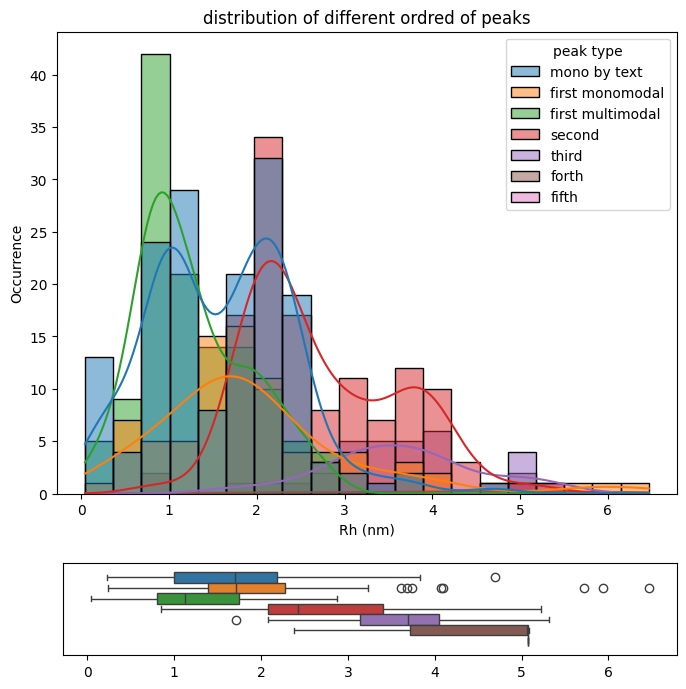

In [213]:
plot_peaks_distribution(distribution_peaks, title="distribution of different ordred of peaks", transform_function=np.log10, hue='peak type',x_label="Rh (nm)")

In [214]:
test = pls_data_cleaned.copy()
test['num_peaks'] = test['Rh at peaks (above 1 nm)'].apply(
    lambda x: len(x) if x is not None else None
)

In [215]:
test.columns.to_list()

['name',
 'Mw (g/mol)',
 'Mn (g/mol)',
 'PDI',
 'Regioregularity R%',
 'DP',
 'SANS',
 'SAXS/GWAXS',
 'DLS',
 'SLS',
 'SEC (GPC)',
 'Dark/light',
 'Applied Electrical Field (Kv/cm)',
 'Duration of Applied Electrical Field (min)',
 'DLS Angle (deg)',
 'Concentration (mg/ml)',
 'Temperature SANS/SLS/DLS/SEC (K)',
 'Aging time (hour)',
 'To Aging Temperature (K)',
 'Stirring /sonication/heating time(min)',
 'Sonication time (min)',
 'Sonication/Stirring/heating Temperature (K)',
 'storage temperature (K)',
 'Storage time (hour)',
 'Solvent(s)',
 'Deuterated solvent',
 'Solid additive',
 'Solid additive quantity (mg/ml)',
 'Solvent solubility parameter (Hansen)',
 'Polymer solubility parameter ',
 'Polymer solubility parameter 𝛿d [MPa1/2]',
 'Polymer solubility parameter  𝛿p [MPa1/2]',
 'Polymer solubility parameter 𝛿h [MPa1/2]',
 'Rh1 (nm)',
 'I1 (Normalized 1-0)',
 'Rh2 (nm)',
 'I2 (Normalized 1-0)',
 'Rh3 (nm)',
 'I3 (Normalized 1-0)',
 'Rh4 (nm)',
 'I4 (Normalized 1-0)',
 'Rh deviation

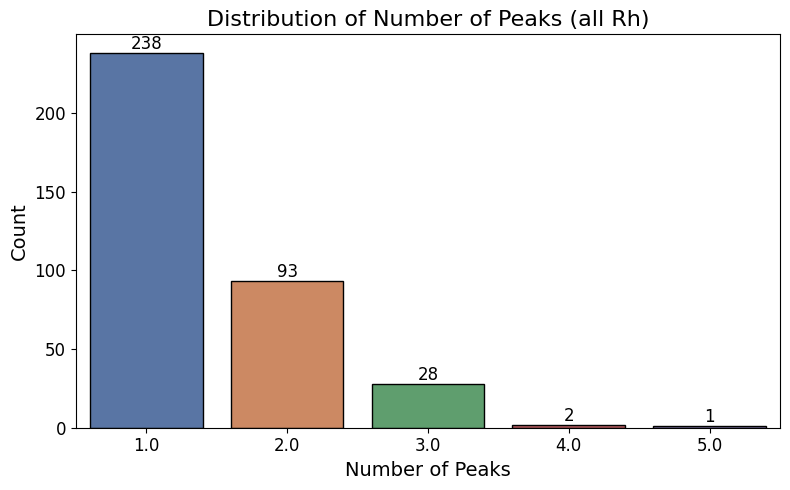

In [216]:
def plot_Rh_modality(df, column):
  peak_counts_all = df[column].value_counts()
  peak_counts_df_all = pd.DataFrame({column: peak_counts_all.index, 'count': peak_counts_all.values}).sort_values(by=column)
  plt.figure(figsize=(8, 5))
  ax = sns.barplot(x=column, y='count', data=peak_counts_df_all, palette='deep', edgecolor='black')

  # Add annotations to each bar
  for bar, count in zip(ax.patches, peak_counts_df_all['count']):
      ax.text(
          bar.get_x() + bar.get_width() / 2,  # x position (center of the bar)
          bar.get_height() ,              # y position (just above the bar)
          str(count),                        # annotation text
          ha='center',                       # horizontal alignment
          va='bottom',                       # vertical alignment
          fontsize=12                        # font size
      )

  # Customize the plot
  ax.set_xlabel("Number of Peaks", fontsize=14)
  ax.set_ylabel("Count", fontsize=14)
  ax.set_title("Distribution of Number of Peaks (all Rh)", fontsize=16)
  ax.tick_params(axis='x', labelsize=12)
  ax.tick_params(axis='y', labelsize=12)

  # Show the plot
  plt.tight_layout()
  plt.show()

plot_Rh_modality(test,'num_peaks')

In [258]:
filtered_rows = test[test['Rh at peaks (above 1 nm)'].apply(
    lambda x: any(val > 100000 for val in x) if isinstance(x, list) else False
)]

# Print the filtered lists and the count
for idx, row in filtered_rows.iterrows():
    print(f"Row {idx}: {row['Rh at peaks (above 1 nm)']}")

# Count rows with at least one value over 500
count = filtered_rows.shape[0]
print(f"\nNumber of rows with at least one value over 500: {count}")

Row 133: [6.286, 217.305, 3608.589, 120753.428]
Row 186: [8.093, 296.793, 133722.391]
Row 187: [6.08, 189.9, 208361.201]
Row 188: [6.148, 245.251, 116127.497]
Row 278: [1.104, 6.989, 51.558, 238.604, 118901.904]
Row 279: [65.939, 167458.034]
Row 280: [517947.468]
Row 281: [857538.7]
Row 282: [2930784.852]
Row 330: [4.579, 211.601, 10733.841, 114892.671]
Row 332: [741.631, 100827.969]

Number of rows with at least one value over 500: 11


In [275]:
def intensity_weighted_average_over_log(R_h, peaks, intensity):
    intensity_at_peaks = [intensity[i] for i in peaks]
    R_h = np.array(R_h)
    I = np.array(intensity_at_peaks)
    weighted_avg = np.sum(np.log10(R_h) * I) / np.sum(I)
    return 10**weighted_avg

# Function to reorder and pad values
def reorder_and_pad(values, peaks, intensity,l1,l2):
    if values is None:
        return values

    values = np.array(values)
    ranges = {
        0: (0, l1),
        1: (l1, l2),
        2: (l2, float('inf'))
    }

    result = [0, 0, 0]

    for key, (lower, upper) in ranges.items():
        in_range = (values >= lower) & (values < upper)
        range_values = values[in_range]

        if len(range_values) > 1 and peaks is not None:
            # Find corresponding peaks and apply weighted averaging
            range_peaks = np.array(peaks)[in_range]
            result[key] = intensity_weighted_average_over_log(
                range_values.tolist(),
                range_peaks.tolist(),
                intensity
            )
        elif len(range_values) == 1:
            result[key] = range_values[0]

    # Handle cases where peaks are None or not applicable
    if peaks is None:
        for key, (lower, upper) in ranges.items():
            in_range = (values >= lower) & (values < upper)
            if in_range.any():
                result[key] = values[in_range][0]  # Assign the value directly

    return result

In [361]:
test["multimodal Rh"] = test.apply(
    lambda row: reorder_and_pad(
        row["Rh at peaks (above 1 nm)"],
        row["peak index (above 1 nm)"],
        row["normalized intensity (0-1) corrected"],
        l1=100,
        l2=1000,
        # threshold=100000
    ),
    axis=1
)

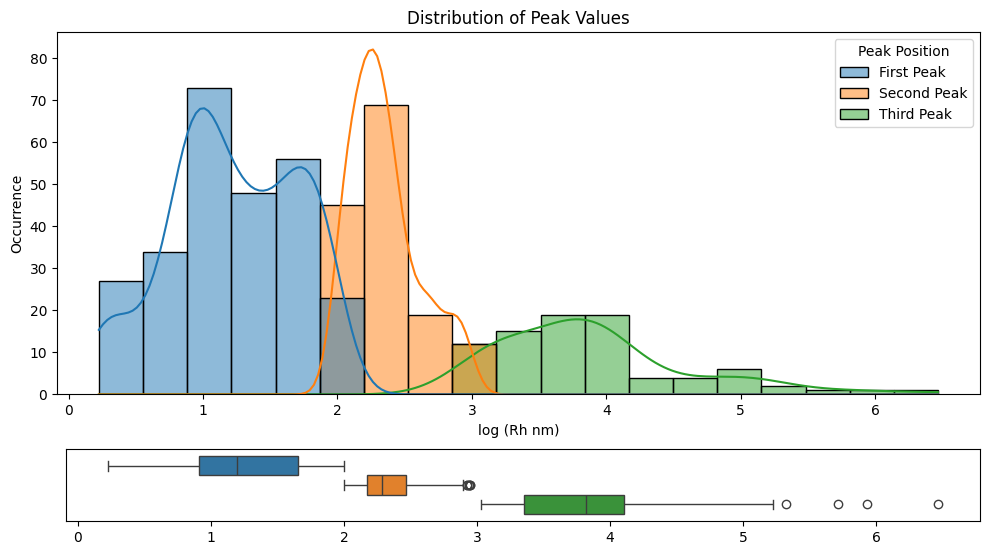

In [362]:
def plot_peak_distribution(data, column_name):
    # Reorder and pad values in the specified column
    df= data.dropna(subset=[column_name])
    reordered_df = pd.DataFrame(df[column_name].tolist(), columns=["First Peak", "Second Peak", "Third Peak"])

    # Melt the dataframe to long format for plotting
    melted_df = reordered_df.melt(var_name="Peak Position", value_name="Value")
    melted_df['transformed_value'] = np.log10(melted_df['Value'])
    # Plotting
    fig, ax = plt.subplots(figsize=(10, 6))

    # Create histogram with KDE
    sns.histplot(data=melted_df, x="transformed_value", kde=True, hue="Peak Position", ax=ax)

    # Customize the histogram
    ax.set_xlabel('log (Rh nm)')
    ax.set_ylabel('Occurrence')
    ax.set_title('Distribution of Peak Values')

    # Create inset boxplot
    box_inset = ax.inset_axes([0.01, -0.35, 0.99, 0.2])  # Adjust position for the inset box plot

    sns.boxplot(x="transformed_value", data=melted_df, hue="Peak Position", ax=box_inset)
    box_inset.set(yticks=[], xlabel=None)
    box_inset.legend_.remove()
    plt.tight_layout()
    plt.show()

plot_peak_distribution(test,"multimodal Rh")

In [363]:
test[test['num_peaks']==4]

,name,Mw (g/mol),Mn (g/mol),PDI,Regioregularity R%,DP,SANS,SAXS/GWAXS,DLS,SLS,...,Ra,abs(solvent dD - polymer dD),abs(solvent dP - polymer dP),abs(solvent dH - polymer dH),peak index (above 1 nm),Rh at peaks (above 1 nm),peak index,Rh at peaks,num_peaks,multimodal Rh
133,PPFOH,14700.0,4637.223975,3.17,NaN,NaN,0,0,1.0,0,...,3.656501,1.7,0.9,1.0,"[6, 20, 34, 44]","[6.286, 217.305, 3608.589, 120753.428]","[6, 20, 34, 44]","[6.286, 217.305, 3608.589, 120753.428]",4.0,"[6.286, 217.305, 34883.02084775767]"
330,PBDT-TTz,44600.0,22300.000000,2.00,NaN,NaN,0,0,1.0,1,...,6.129437,0.6,4.2,4.3,"[4, 12, 20, 25]","[4.579, 211.601, 10733.841, 114892.671]","[4, 12, 20, 25]","[4.579, 211.601, 10733.841, 114892.671]",4.0,"[4.579, 211.601, 58490.82290990921]"


In [364]:
my_test = test.copy()
first_array_non_zero = my_test['multimodal Rh'].apply(
    lambda x: x[0] != 0 if isinstance(x, list) else False
).sum()

second_array_non_zero = my_test['multimodal Rh'].apply(
    lambda x: x[1] != 0 if isinstance(x, list) else False
).sum()

third_array_non_zero = my_test['multimodal Rh'].apply(
    lambda x: x[2] != 0 if isinstance(x, list) else False
).sum()
# Print the results
print(f"Non-zero values in the first array: {first_array_non_zero}")
print(f"Non-zero values in the second array: {second_array_non_zero}")
print(f"Non-zero values in the third array: {third_array_non_zero}")

Non-zero values in the first array: 261
Non-zero values in the second array: 145
Non-zero values in the third array: 84


In [372]:
y = test["multimodal Rh"]

In [384]:
y

,multimodal Rh
0,"[35.9, 0, 0]"
1,"[19.8, 0, 0]"
2,"[33.7, 0, 0]"
3,"[5.896, 120.558, 0]"
4,"[7.881, 171.514, 0]"
...,...
668,"[5.049, 111.454, 0]"
669,"[15.465, 261.274, 0]"
670,"[7.485, 126.08, 0]"
671,"[72.12452002016333, 0, 0]"


In [ ]:
reordered_df = pd.DataFrame(test["multimodal Rh"].tolist(), columns=["First Peak", "Second Peak", "Third Peak"])
melted_df = reordered_df.melt(var_name="Peak Position", value_name="Value")

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))

# Create histogram with KDE
sns.histplot(data=melted_df, x="Value", kde=True, hue="Peak Position", ax=ax)

# Customize the histogram
ax.set_xlabel('Value')
ax.set_ylabel('Occurrence')
ax.set_title('Distribution of Peak Values')
plt.show()

KeyboardInterrupt: 

Error in callback <function _draw_all_if_interactive at 0x7a4f3e8524d0> (for post_execute):


KeyboardInterrupt: 

Error in callback <function flush_figures at 0x7a4f3e8511b0> (for post_execute):


KeyboardInterrupt: 

In [ ]:
melted_df

,Peak Position,Value
0,First Peak,35.900
1,First Peak,19.800
2,First Peak,33.700
3,First Peak,5.896
4,First Peak,7.881
...,...,...
1081,Third Peak,0.000
1082,Third Peak,0.000
1083,Third Peak,0.000
1084,Third Peak,0.000
